## Problem Statement
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 


**Approach** - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

# Decision Tree

It is a supervised machine learning algorithm used for both classification and regression tasks. It's a graphical representation of a decision-making process that can be used to make decisions by following a series of branching logical statements. Decision Trees are a fundamental concept in machine learning and data analysis due to their simplicity and interpretability.

Here's how a Decision Tree works:

1. **Tree Structure**: A Decision Tree consists of nodes and branches. At the top, there is a root node, which represents the entire dataset. The root node is split into child nodes based on a feature that best separates the data.

2. **Internal Nodes**: Internal nodes represent a decision or a test on a specific feature. These nodes have branches leading to child nodes based on the outcomes of the test. Each branch represents a possible outcome of the test.

3. **Leaf Nodes**: Leaf nodes are the final nodes in the tree and represent the predicted class or value. They do not have any child nodes.

4. **Splitting**: The process of creating a Decision Tree involves selecting the best feature to split the data at each internal node. The goal is to minimize impurity or maximize information gain, depending on the algorithm used.

5. **Pruning**: Decision Trees can grow very deep, resulting in overfitting (capturing noise in the data). Pruning involves removing some branches of the tree to simplify it and improve generalization to unseen data.

Decision Trees are used in the following ways:

- **Classification**: In classification tasks, Decision Trees are used to classify data into discrete classes or categories. At each internal node, a decision is made about which branch to follow based on the values of the features, ultimately leading to a predicted class at the leaf node.

- **Regression**: In regression tasks, Decision Trees are used to predict a continuous numeric value. At each internal node, a decision is made about which branch to follow based on the values of the features, and the predicted value at the leaf node is typically the average or mean of the target values of the training data that reached that leaf.

Key advantages of Decision Trees include their interpretability and the ability to handle both categorical and numerical data. However, they are prone to overfitting when not pruned correctly. To address this, techniques like Random Forests and Gradient Boosting Trees are often used, which combine multiple Decision Trees to improve accuracy and robustness.

Decision Trees are widely used in various domains, including finance, healthcare, marketing, and natural language processing, due to their ability to handle both classification and regression tasks and provide insights into the decision-making process.

1. **Data Preprocessing**:
   - Check for missing data and handle it if necessary (e.g., by imputing missing values).
   - Convert the "Sales" variable into a categorical variable if it's not already categorical. You can define thresholds to categorize sales as "high," "medium," and "low."

2. **Splitting the Data**:
   - Divide your dataset into a training set and a testing set. This will allow you to train the decision tree on one subset and evaluate its performance on another.

3. **Building the Decision Tree**:
   - Use the training set to build a decision tree model. In your case, the "Sales" variable will be the target variable, and all other variables (Competitor Price, Income, Advertising, Population, Price, Shelf Location, Age, Education, Urban, and US) will be independent variables or features.

4. **Tuning the Tree**:
   - Depending on your software or library of choice (e.g., scikit-learn in Python), you may have options to set hyperparameters like the maximum depth of the tree or the minimum number of samples required to split a node. Tuning these hyperparameters can help you avoid overfitting.

5. **Evaluating the Model**:
   - Once you've built the decision tree, evaluate its performance on the testing set. You can use metrics like accuracy, precision, recall, or F1-score, depending on your specific goals.

6. **Interpreting the Tree**:
   - Interpret the decision tree to understand which attributes or segments contribute most to high sales. You can do this by examining the tree's structure, looking at feature importance scores, or visualizing the tree.

7. **Making Business Recommendations**:
   - Based on the insights gained from the decision tree analysis, provide recommendations to the cloth manufacturing company on how they can improve sales. For example, if the analysis shows that "Urban" locations tend to have higher sales, the company might focus more on urban areas for marketing and distribution.

8. **Iterate and Refine**:
   - Decision tree analysis is not a one-time task. It's an iterative process. You may need to refine your model, collect more data, or consider additional factors over time to improve your understanding of what drives high sales.

Remember that decision trees are just one tool in the data analysis toolbox. Depending on your data and goals, you may want to explore other machine learning techniques or statistical analyses to gain deeper insights into the factors affecting sales.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


#### About the data: 

**Sales**--Unit sales (in thousands) at each location

**Competitor Price**--Price charged by competitor at each location

**Income**--Community income level (in thousands of dollars)

**Advertising**--Local advertising budget for company at each location (in thousands of dollars)

**Population**--Population size in region (in thousands)

**Price**--Price company charges for car seats at each site

**Shelf Location at stores**--A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

**Age**--Average age of the local population

**Education**--Education level at each location

**Urban**--A factor with levels No and Yes to indicate whether the store is in an urban or rural location

**US**--A factor with levels No and Yes to indicate whether the store is in the US or not

##### Data Understanding

In [4]:
data.shape

(400, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [7]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


The features are not on the same scale.  "Income" is in thousands of dollars, "Age" is in years, and "Price" can be in various units.

**Scaling Requirement for Algorithms**:
Some machine learning algorithms are sensitive to the scale of input features. For example, algorithms like Support Vector Machines (SVM), K-Means Clustering, and Principal Component Analysis (PCA) often perform better when features are on a similar scale. Decision Trees, on the other hand, are not sensitive to feature scaling.

In [11]:
Cloth_Data=data.copy()

#### Data Pre-processing

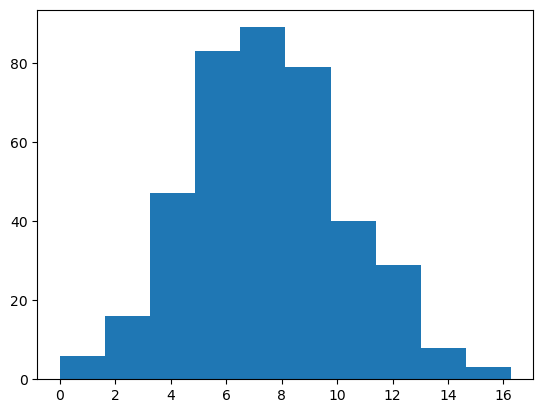

In [12]:
plt.hist('Sales',data=Cloth_Data)
plt.show()

Sales follows normal distribution, so we can take mean or median as a threshold to make three categories **'Low', 'Medium' and 'High'** Sales

**Convert 'Sales' into categorical variable (e.g., 'High', 'Medium', 'Low')**

In [13]:
Cloth_Data['SalesCategory']=pd.cut(x=Cloth_Data['Sales'],bins=[0,5.39,9.32,17],labels=['Low','Medium','High'],right = False)

In [14]:
Cloth_Data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesCategory
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [15]:
Cloth_Data.SalesCategory.value_counts()

Medium    198
High      102
Low       100
Name: SalesCategory, dtype: int64

In [16]:
Cloth_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Sales          400 non-null    float64 
 1   CompPrice      400 non-null    int64   
 2   Income         400 non-null    int64   
 3   Advertising    400 non-null    int64   
 4   Population     400 non-null    int64   
 5   Price          400 non-null    int64   
 6   ShelveLoc      400 non-null    object  
 7   Age            400 non-null    int64   
 8   Education      400 non-null    int64   
 9   Urban          400 non-null    object  
 10  US             400 non-null    object  
 11  SalesCategory  400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [17]:
categorical_features=Cloth_Data.describe(include=["object",'category']).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US', 'SalesCategory'], dtype='object')

In [18]:
numerical_features=Cloth_Data.describe(include=["int64","float64"]).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

In [19]:
from scipy import stats

# Calculate Z-scores for each specified column
z_scores=pd.DataFrame()
for column in numerical_features:
    z_scores[column] = np.abs(stats.zscore(Cloth_Data[column]))

# Define a threshold for identifying outliers (e.g., Z-score greater than 3)
threshold=3

# Identify outliers based on the threshold
outliers=(z_scores > threshold)

# Count the number of outliers in each column
outlier_counts=outliers.sum()

# Print the columns with the number of outliers
print("Number of outliers in each column:")
print(outlier_counts)

Number of outliers in each column:
Sales          1
CompPrice      2
Income         0
Advertising    1
Population     0
Price          2
Age            0
Education      0
dtype: int64


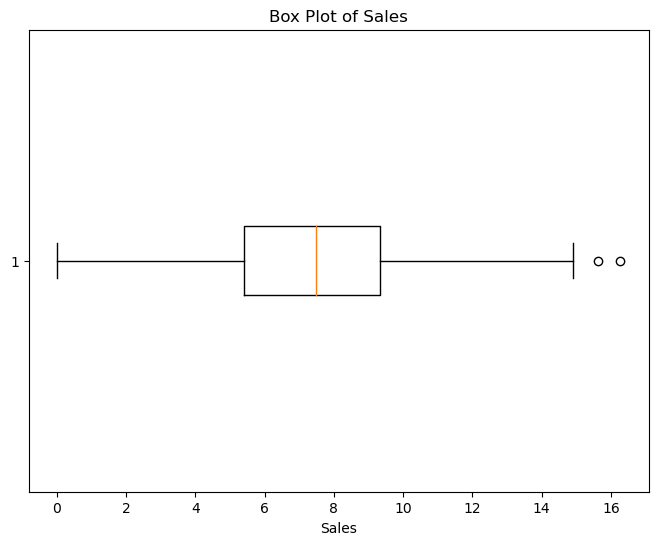

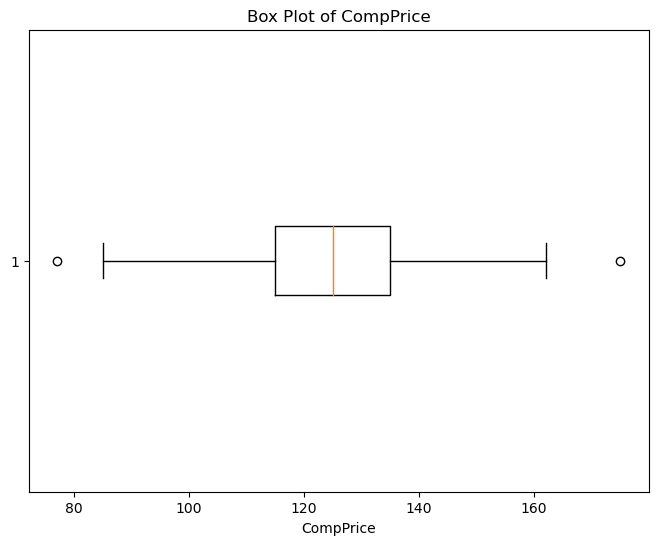

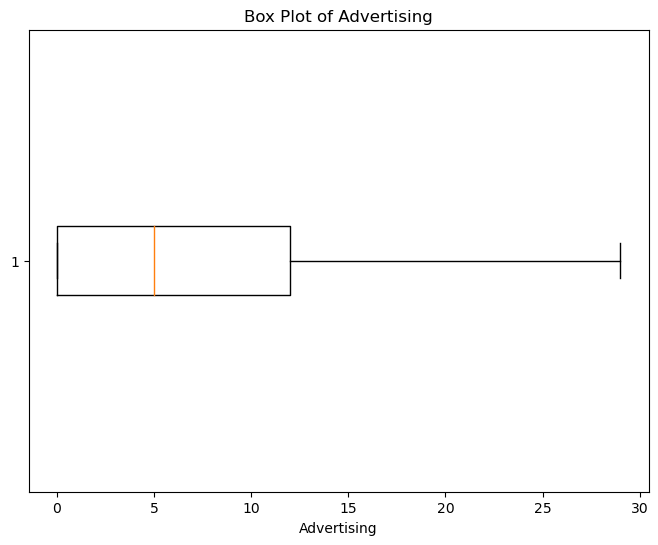

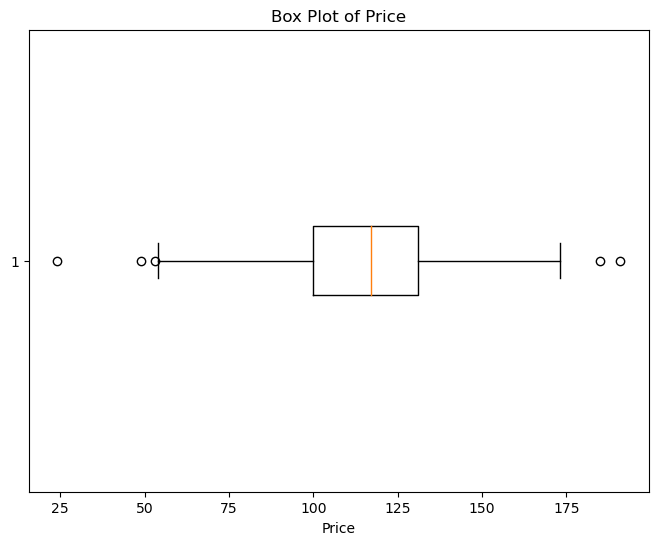

In [20]:
# Define the columns with outliers
columns_with_outliers=["Sales","CompPrice","Advertising","Price"]

# Create box plots for columns with outliers
for column in columns_with_outliers:
    plt.figure(figsize=(8,6))
    plt.boxplot(Cloth_Data[column],vert=False)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

##### Data Visulaization

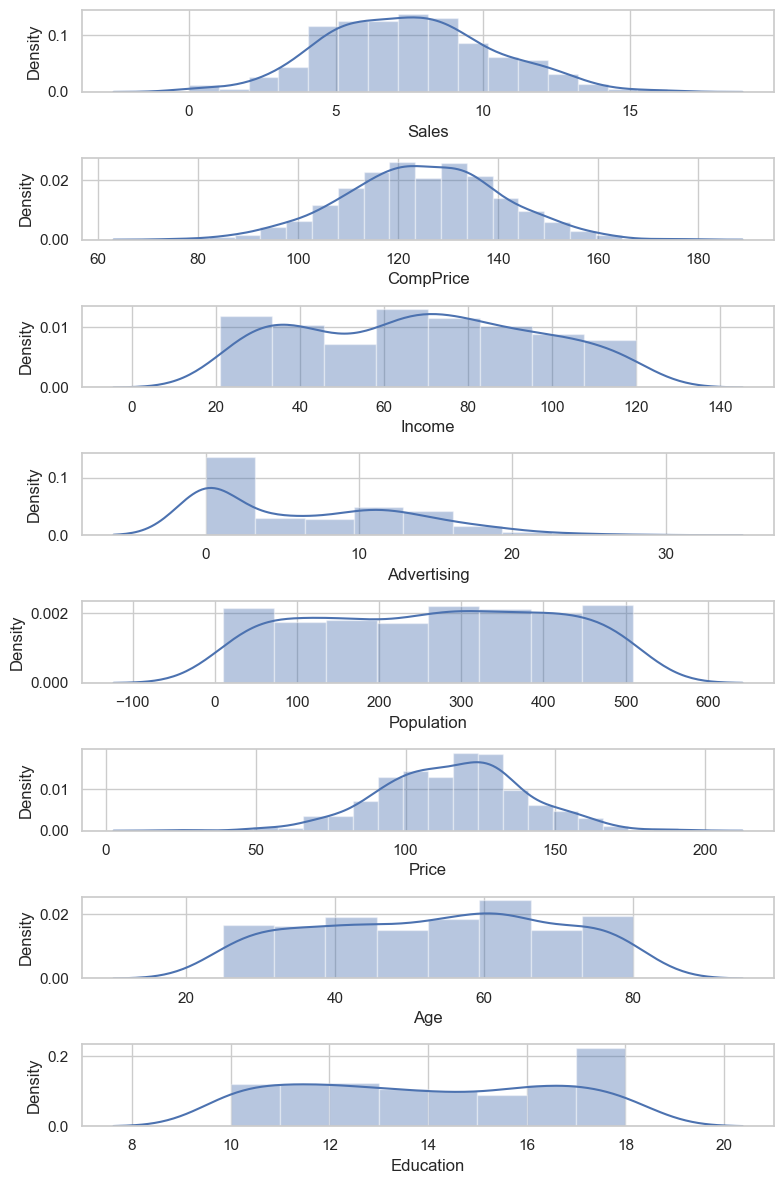

In [21]:
# Set the style for the plots (optional but can enhance the appearance)
sns.set(style="whitegrid")

# Create subplots for each numerical feature
fig,axes=plt.subplots(nrows=len(numerical_features),ncols=1,figsize=(8,12))
for i,column in enumerate(numerical_features):
    sns.distplot(Cloth_Data[column],ax=axes[i],kde=True)  # Create a distplot for the current column
    axes[i].set_xlabel(column)  # Set the x-axis label for the current subplot

plt.tight_layout()  # Adjust subplot layout for readability
plt.show()

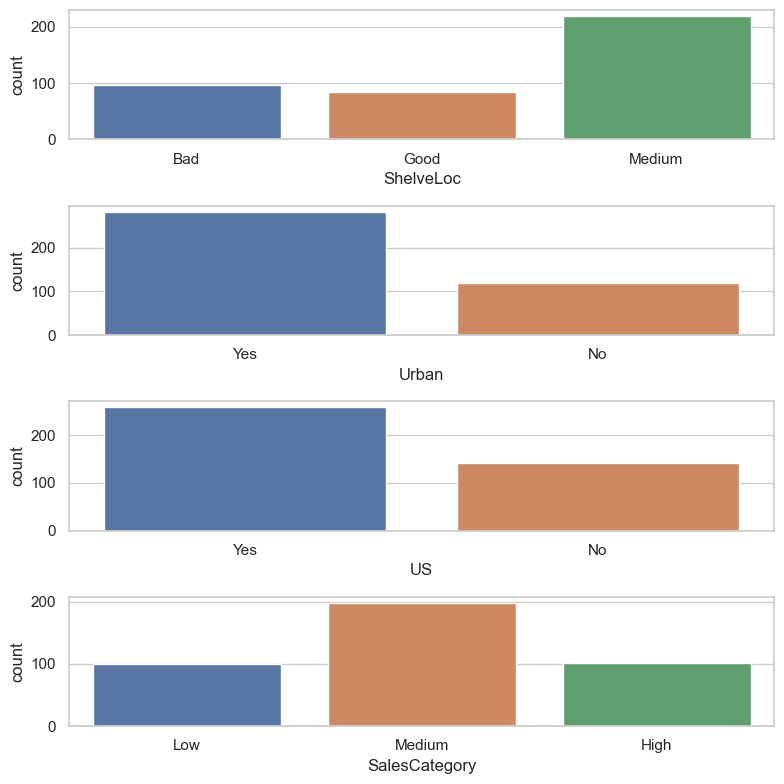

In [22]:
# Set the style for the plots (optional but can enhance the appearance)
sns.set(style="whitegrid")

# Create subplots for each categorical feature
fig,axes=plt.subplots(nrows=len(categorical_features),ncols=1,figsize=(8,8))
for i,column in enumerate(categorical_features):
    sns.countplot(data=Cloth_Data,x=column,ax=axes[i])  # Create a count plot for the current column
    axes[i].set_xlabel(column)  # Set the x-axis label for the current subplot

plt.tight_layout()  # Adjust subplot layout for readability
plt.show()

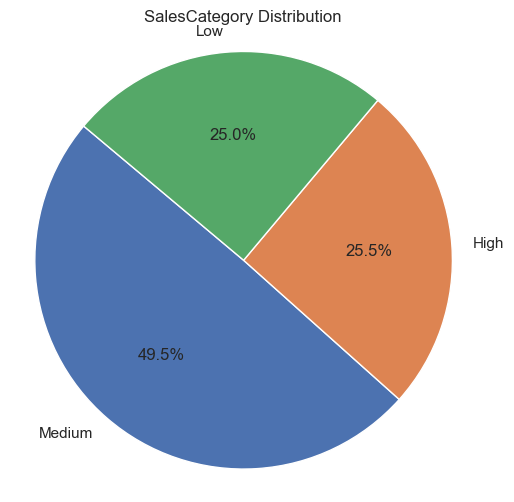

In [23]:
# Calculate the distribution of 'SalesCategory' values
category_counts=Cloth_Data['SalesCategory'].value_counts()

# Extract labels and sizes for the pie chart
labels=category_counts.index
sizes=category_counts.values

# Create a pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=140)
plt.title('SalesCategory Distribution')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

Here, the class “Medium” is called the majority class, and the much smaller in size “Low” and “High” class is called the minority class.

<AxesSubplot:>

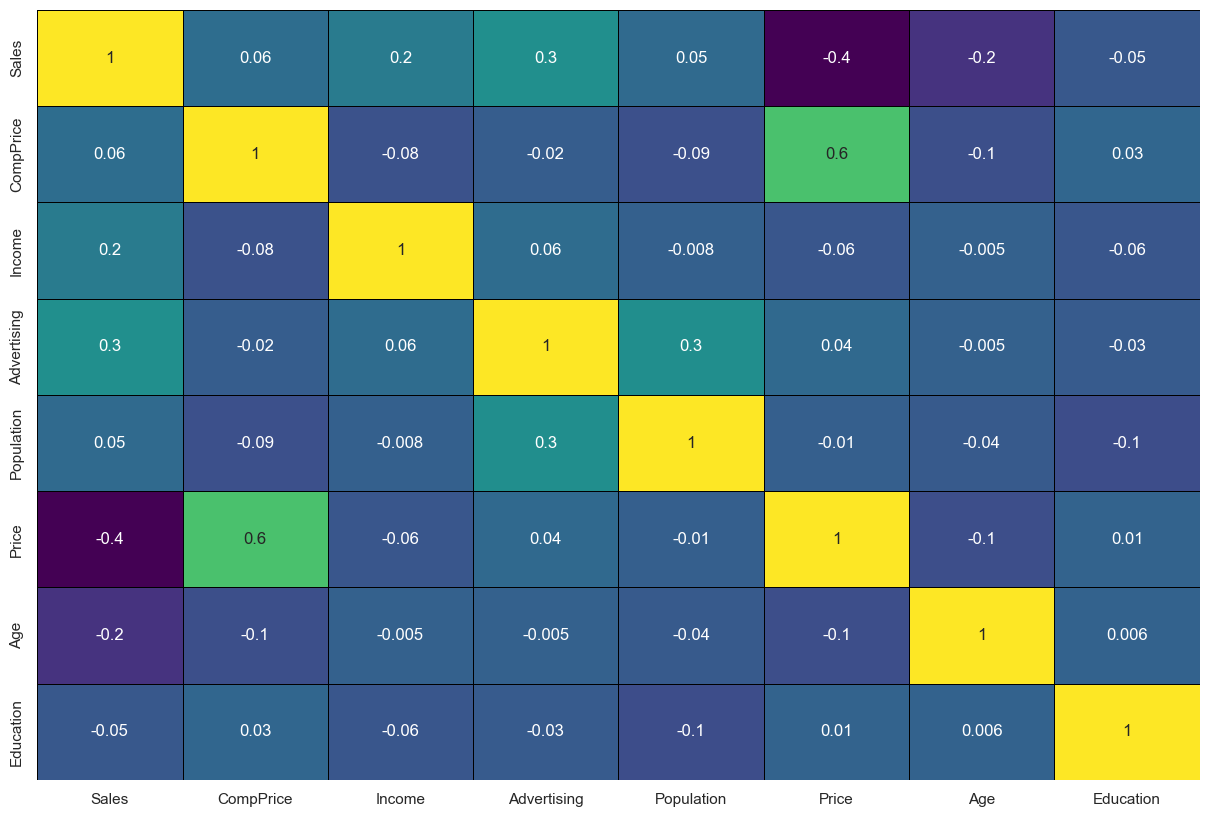

In [24]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(Cloth_Data.corr(),annot=True,fmt='.1g',cmap="viridis",cbar=False,linewidths=0.5,linecolor='black')

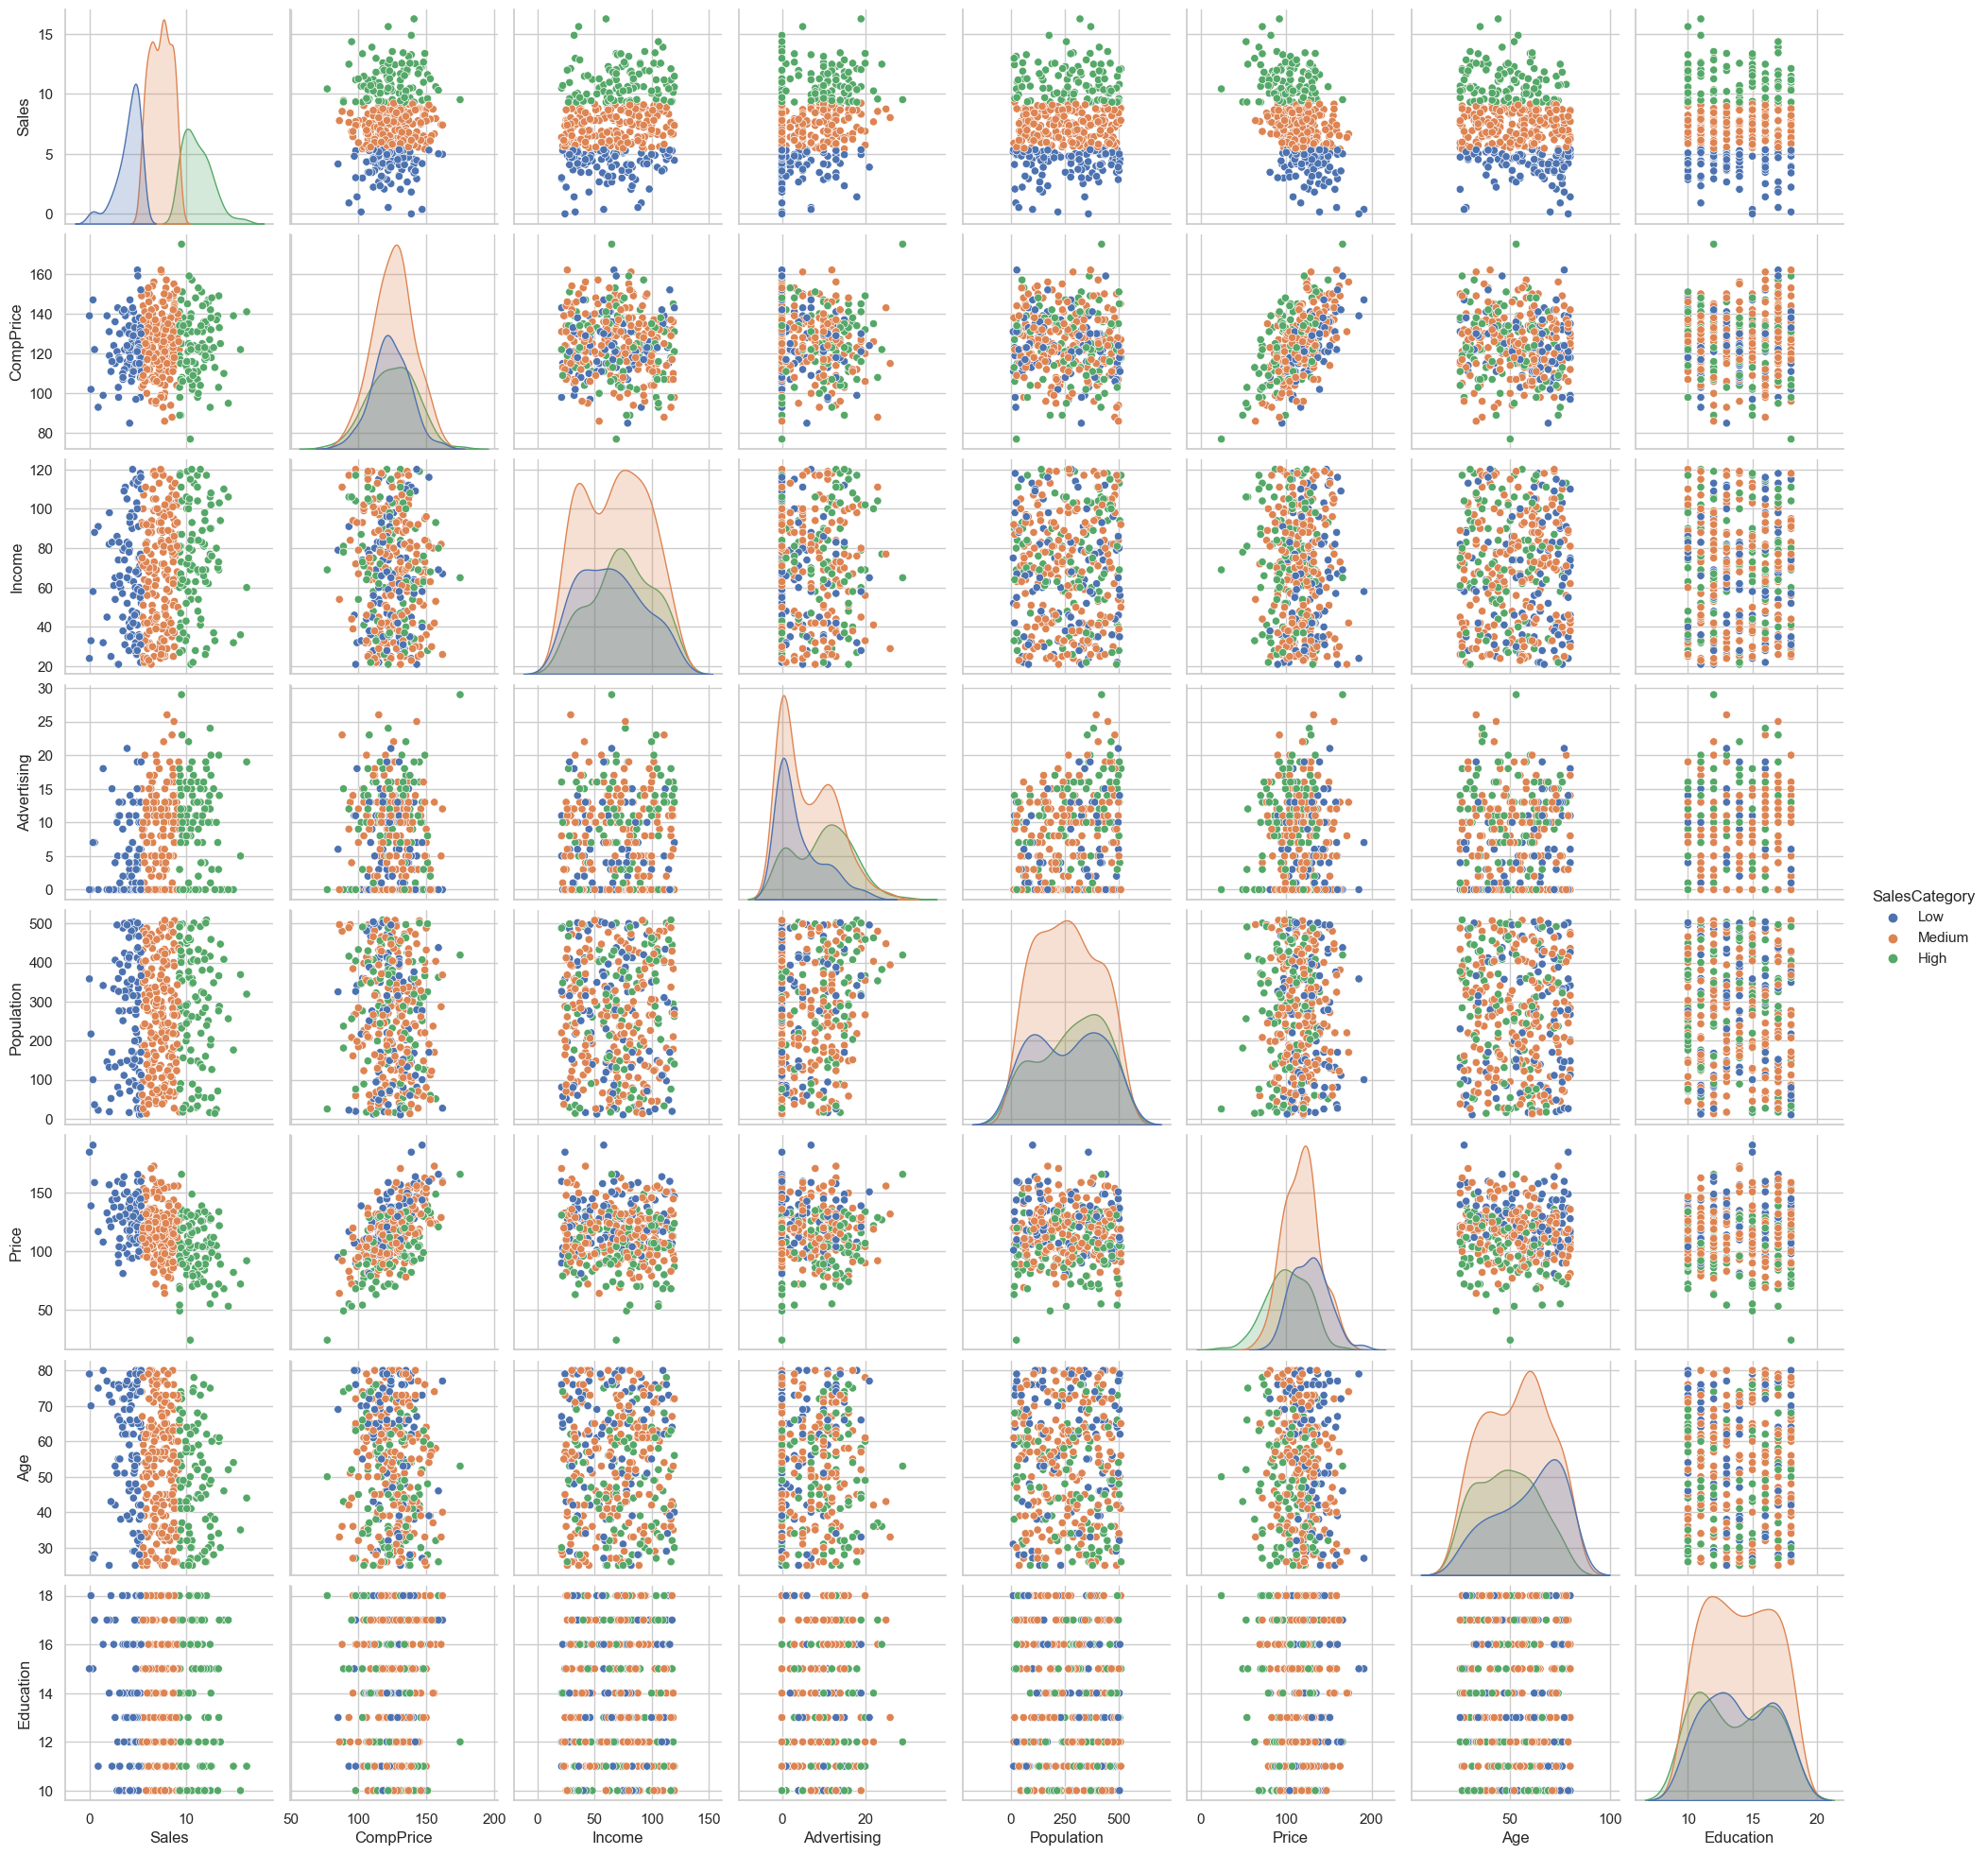

In [25]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=Cloth_Data,hue='SalesCategory')

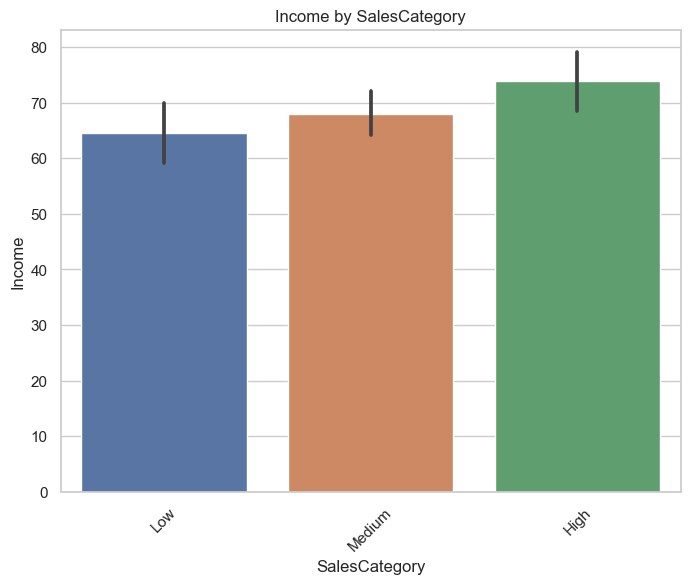

In [27]:
# Set the style for the plot (optional but can enhance the appearance)
sns.set(style="whitegrid")

# Create a box plot of 'Income' based on 'SalesCategory'
plt.figure(figsize=(8,6))
sns.barplot(data=Cloth_Data,x='SalesCategory',y='Income')
plt.title('Income by SalesCategory')

# Adjust the plot for readability
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Display the plot
plt.show()

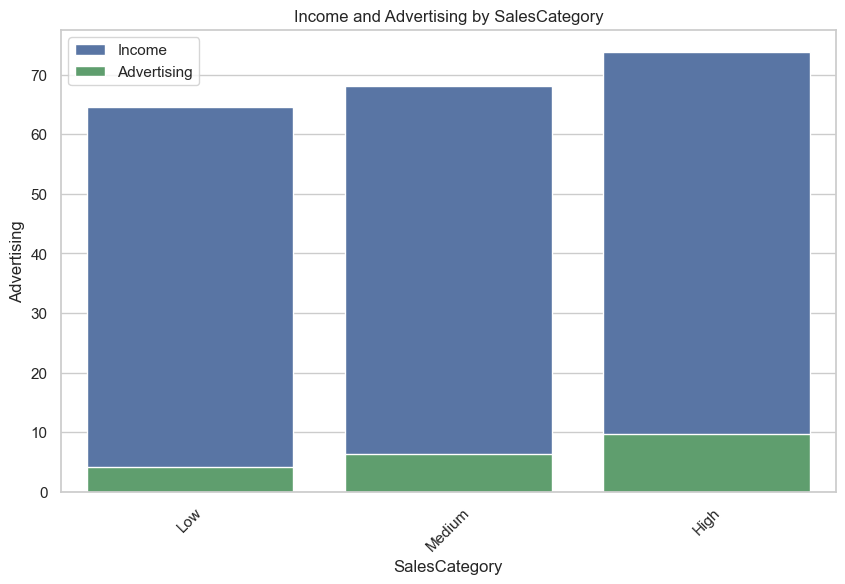

In [28]:

# Set the style for the plot (optional but can enhance the appearance)
sns.set(style="whitegrid")

# Create a grouped bar plot for 'Income' and 'Advertising' based on 'SalesCategory'
plt.figure(figsize=(10,6))
sns.barplot(data=Cloth_Data,x='SalesCategory',y='Income', ci=None, color='b', label='Income')
sns.barplot(data=Cloth_Data, x='SalesCategory', y='Advertising', ci=None, color='g', label='Advertising')
plt.title('Income and Advertising by SalesCategory')
plt.legend()

# Display the grouped bar chart
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

##### Feature Engineering

In [30]:
Cloth_Data.drop(columns=['Sales'],inplace=True)

In [31]:
# Rename the 'SalesCategory' column to 'Sales'
Cloth_Data=Cloth_Data.rename(columns={'SalesCategory': 'Sales'})

In [32]:
Cloth_Data.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High


In [33]:
# Perform one-hot encoding
Cloth_Data=pd.get_dummies(Cloth_Data,columns=['ShelveLoc','Urban','US'])

In [34]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder=LabelEncoder()

# Apply label encoding to the categorical column
Cloth_Data['Sales']=label_encoder.fit_transform(Cloth_Data['Sales'])

In [36]:
Cloth_Data.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'Sales', 'ShelveLoc_Bad', 'ShelveLoc_Good',
       'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes'],
      dtype='object')

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Separate the features (X) and the target variable (y)
X=Cloth_Data[['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
          'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium',
          'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes']]
y=Cloth_Data['Sales']

# Initialize a Decision Tree Classifier
clf=DecisionTreeClassifier()

# Fit the classifier to the data
clf.fit(X, y)

# Get feature importances
feature_importance=clf.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df=pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df=feature_importance_df.sort_values(by='Importance', ascending=False)

In [39]:
feature_importance_df

,Feature,Importance
4,Price,0.186662
5,Age,0.135094
2,Advertising,0.133147
1,Income,0.103464
3,Population,0.102812
0,CompPrice,0.098622
8,ShelveLoc_Good,0.089144
6,Education,0.081693
7,ShelveLoc_Bad,0.044411
11,Urban_Yes,0.013661


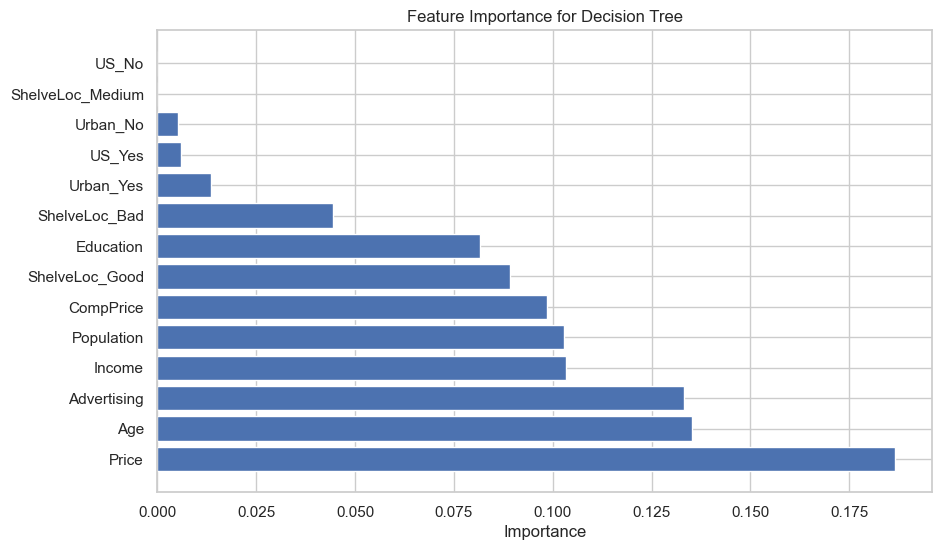

In [40]:
# Create a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance for Decision Tree')
plt.show()

In [41]:
model_data=Cloth_Data[['Price','Advertising','Population', 'Income', 'Age', 'ShelveLoc_Good', 'ShelveLoc_Bad','CompPrice','Education','Urban_Yes','Urban_No','US_Yes','Sales']]
model_data.head(3)

,Price,Advertising,Population,Income,Age,ShelveLoc_Good,ShelveLoc_Bad,CompPrice,Education,Urban_Yes,Urban_No,US_Yes,Sales
0,120,11,276,73,42,0,1,138,17,1,0,1,0
1,83,16,260,48,65,1,0,111,10,1,0,1,0
2,80,10,269,35,59,0,0,113,12,1,0,1,0


##### Model Building,Training & Evaluation

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree

In [44]:
x=model_data.drop('Sales',axis=1)
y=model_data['Sales']

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [46]:
x_train.shape,y_train.shape

((320, 12), (320,))

In [47]:
x_test.shape,y_test.shape

((80, 12), (80,))

In [49]:
model=DecisionTreeClassifier(max_depth=8,criterion='entropy',max_leaf_nodes=10)
model.fit(x_train,y_train)
train_predicted=model.predict(x_train)

In [50]:
confusion_matrix(y_train,train_predicted)

array([[ 64,   2,  14],
       [  0,  38,  52],
       [ 32,   6, 112]], dtype=int64)

In [51]:
print(classification_report(y_train,train_predicted))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        80
           1       0.83      0.42      0.56        90
           2       0.63      0.75      0.68       150

    accuracy                           0.67       320
   macro avg       0.71      0.66      0.66       320
weighted avg       0.69      0.67      0.66       320



In [52]:
test_predicted=model.predict(x_test)

In [53]:
confusion_matrix(y_test,test_predicted)

array([[18,  0,  4],
       [ 0,  5,  5],
       [11,  5, 32]], dtype=int64)

In [54]:
print(classification_report(y_test,test_predicted))

              precision    recall  f1-score   support

           0       0.62      0.82      0.71        22
           1       0.50      0.50      0.50        10
           2       0.78      0.67      0.72        48

    accuracy                           0.69        80
   macro avg       0.63      0.66      0.64        80
weighted avg       0.70      0.69      0.69        80



In [55]:
features=x.columns.values

In [56]:
features

array(['Price', 'Advertising', 'Population', 'Income', 'Age',
       'ShelveLoc_Good', 'ShelveLoc_Bad', 'CompPrice', 'Education',
       'Urban_Yes', 'Urban_No', 'US_Yes'], dtype=object)

In [59]:
classes=['0','1','2']

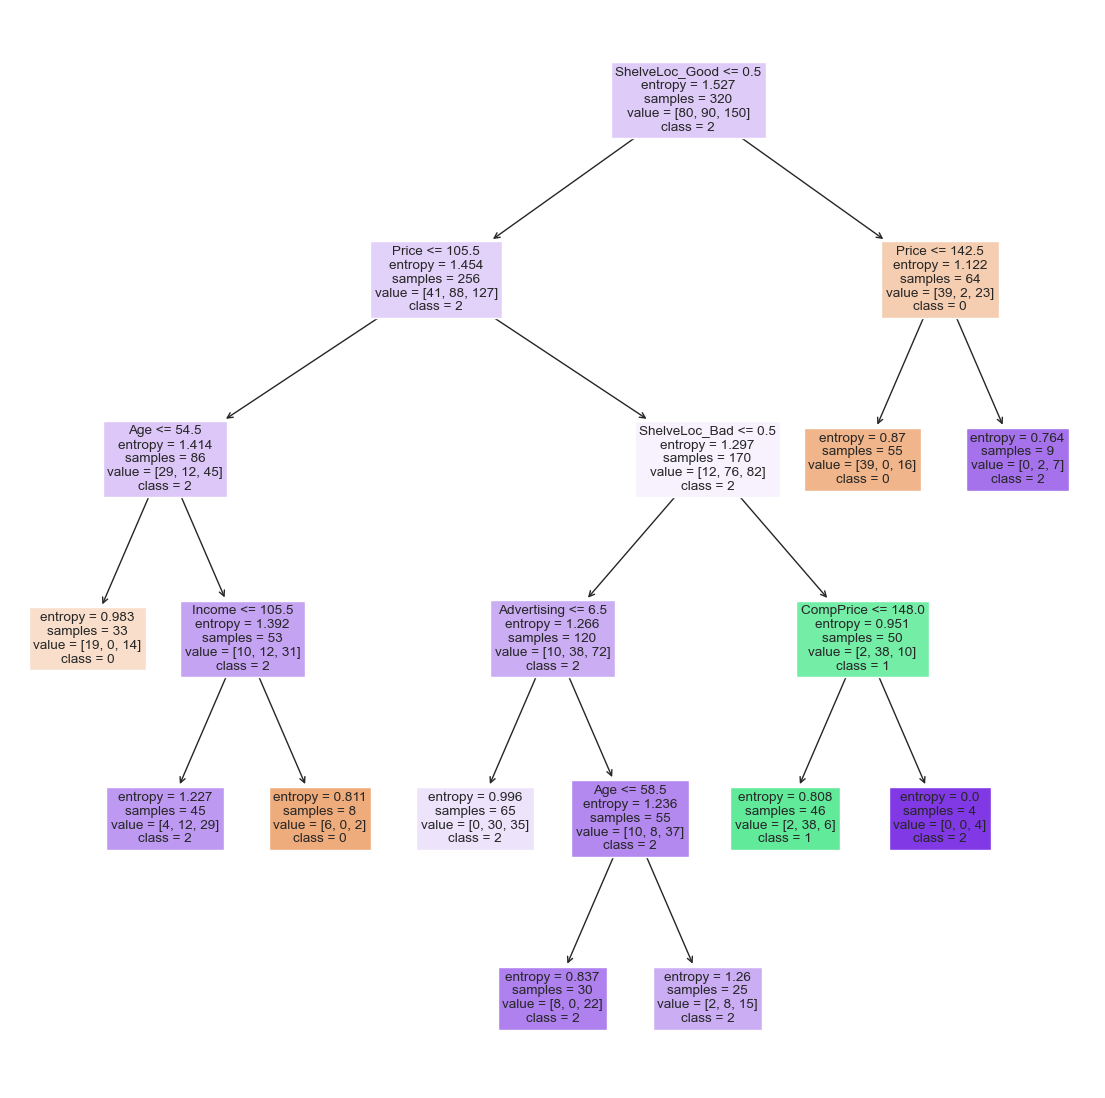

In [60]:
fig,axes=plt.subplots(figsize=(14,14))
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()